In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import scipy as sp

### 1. Загрузка данных

In [9]:
df = pd.read_csv('../../../../data/titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2. Пропуски в данных

In [23]:
import random
from numpy import NaN

r = random.Random(9991)
nan_data = df.copy()
for i in range(nan_data.shape[0]):
    if r.randint(0,100) < 15:
        selected_column = r.choice(nan_data.columns)
        nan_data[selected_column][i] = NaN
        
print(f'Было заполненных строк:\n{df.dropna().count()}')
print(f'После обработки:\n{nan_data.dropna().count()}')

c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Было заполненных строк:
PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64
После обработки:
PassengerId    165
Survived       165
Pclass         165
Name           165
Sex            165
Age            165
SibSp          165
Parch          165
Ticket         165
Fare           165
Cabin          165
Embarked       165
dtype: int64


Проба всех методов заполнения. Критерий оценки заполненности не является адекватным, т.к большая часть методов способно обработать лишь числовые данные

In [24]:
print(f'Всего данных: \n{nan_data.count()}')

Всего данных: 
PassengerId    881
Survived       882
Pclass         881
Name           877
Sex            878
Age            704
SibSp          884
Parch          885
Ticket         882
Fare           882
Cabin          203
Embarked       877
dtype: int64


In [25]:
nan_data_fill_const = nan_data.fillna(0)
print(f'Данных после заполнения константой: \n{nan_data_fill_const.dropna().count()}')
nan_data_fill_const.head(10)

Данных после заполнения константой: 
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,0,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,S
3,4.0,1.0,1.0,0,female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,0,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,0.0,0.0,0.0,330877,8.4583,0,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,0,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,0,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,0,C


In [26]:
nan_data_fill_mean = nan_data.fillna(nan_data.mean())
print(f'Средние значения:\n{nan_data.mean()}')
print(f'Данных после заполнения средним: \n{nan_data_fill_mean.dropna().count()}')
nan_data_fill_mean.head(10)

Средние значения:
PassengerId    447.391600
Survived         0.382086
Pclass           2.306470
Age             29.721832
SibSp            0.524887
Parch            0.381921
Fare            32.101752
dtype: float64
Данных после заполнения средним: 
PassengerId    194
Survived       194
Pclass         194
Name           194
Sex            194
Age            194
SibSp          194
Parch          194
Ticket         194
Fare           194
Cabin          194
Embarked       194
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,447.3916,0.0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.000000,0.0,A/5 21171,7.2500,NaN,S
1,2.0000,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,0.524887,0.0,PC 17599,71.2833,C85,C
2,3.0000,1.0,3.0,"Heikkinen, Miss. Laina",female,26.000000,0.000000,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0000,1.0,1.0,NaN,female,35.000000,1.000000,0.0,113803,53.1000,C123,S
4,5.0000,0.0,3.0,"Allen, Mr. William Henry",male,35.000000,0.000000,0.0,373450,8.0500,NaN,S
5,6.0000,0.0,3.0,"Moran, Mr. James",male,29.721832,0.000000,0.0,330877,8.4583,NaN,Q
6,7.0000,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.000000,0.000000,0.0,17463,51.8625,E46,S
7,8.0000,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.000000,3.000000,1.0,349909,21.0750,NaN,S
8,9.0000,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.000000,2.0,347742,11.1333,NaN,S
9,10.0000,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.000000,0.0,237736,30.0708,NaN,C


In [27]:
nan_data_fill_near = nan_data.fillna(method='pad')
print(f'Данных после заполнения соседями: \n{nan_data_fill_near.dropna().count()}')
nan_data_fill_near.head(10)

Данных после заполнения соседями: 
PassengerId    890
Survived       890
Pclass         890
Name           890
Sex            890
Age            890
SibSp          890
Parch          890
Ticket         890
Fare           890
Cabin          890
Embarked       890
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C85,S
3,4.0,1.0,1.0,"Heikkinen, Miss. Laina",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,C123,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,35.0,0.0,0.0,330877,8.4583,C123,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,E46,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,E46,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,E46,C


In [28]:
nan_data_fill_interpolate = nan_data.interpolate(method='cubic')
print(f'Данных после заполнения интерполяцией: \n{nan_data_fill_interpolate.dropna().count()}')
nan_data_fill_interpolate.head(10)

Данных после заполнения интерполяцией: 
PassengerId    194
Survived       194
Pclass         194
Name           194
Sex            194
Age            194
SibSp          194
Parch          194
Ticket         194
Fare           194
Cabin          194
Embarked       194
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.000000,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,-1.186969,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.000000,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,NaN,female,35.00000,1.000000,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.000000,0.0,373450,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,58.24144,0.000000,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00000,0.000000,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00000,3.000000,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0.000000,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1.000000,0.0,237736,30.0708,NaN,C


In [29]:
nan_data_fill_interpolate_and_near = nan_data_fill_interpolate.fillna(method='pad')
print(f'Данных после заполнения интерполяцией и соседями: \n{nan_data_fill_interpolate_and_near.dropna().count()}')
nan_data_fill_interpolate_and_near.head(10)

Данных после заполнения интерполяцией и соседями: 
PassengerId    890
Survived       890
Pclass         890
Name           890
Sex            890
Age            890
SibSp          890
Parch          890
Ticket         890
Fare           890
Cabin          890
Embarked       890
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00000,1.000000,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,-1.186969,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00000,0.000000,0.0,STON/O2. 3101282,7.9250,C85,S
3,4.0,1.0,1.0,"Heikkinen, Miss. Laina",female,35.00000,1.000000,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00000,0.000000,0.0,373450,8.0500,C123,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,58.24144,0.000000,0.0,330877,8.4583,C123,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00000,0.000000,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00000,3.000000,1.0,349909,21.0750,E46,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0.000000,2.0,347742,11.1333,E46,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1.000000,0.0,237736,30.0708,E46,C


In [22]:
nan_data_dropnan = nan_data.dropna()
print(f'Данных после сброса незаполненных значений: \n{nan_data_dropnan.count()}')
nan_data_dropnan.head(10)

Данных после сброса незаполненных значений: 
PassengerId    165
Survived       165
Pclass         165
Name           165
Sex            165
Age            165
SibSp          165
Parch          165
Ticket         165
Fare           165
Cabin          165
Embarked       165
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
23,24.0,1.0,1.0,"Sloper, Mr. William Thompson",male,28.0,0.0,0.0,113788,35.5000,A6,S
27,28.0,0.0,1.0,"Fortune, Mr. Charles Alexander",male,19.0,3.0,2.0,19950,263.0000,C23 C25 C27,S
54,55.0,0.0,1.0,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C
62,63.0,0.0,1.0,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.4750,C83,S
66,67.0,1.0,2.0,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0.0,0.0,C.A. 29395,10.5000,F33,S
75,76.0,0.0,3.0,"Moen, Mr. Sigurd Hansen",male,25.0,0.0,0.0,348123,7.6500,F G73,S


### (2)3.Нормализация

In [36]:
import sklearn.preprocessing as preprocessing
df = df.interpolate(method='cubic').fillna(method='pad')
# Перед нормализацией удаляем маловлияющие признаки (Id остался для сопоставления)
number_data = df.copy().drop(['Name','Cabin','Ticket'], axis=1)
number_data = pd.get_dummies(number_data)
number_data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1


In [45]:
norm_number_data = number_data.copy()
sel_columns = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

#Для сохранения индексов был выбран подобный метод
mm_scalar = preprocessing.MinMaxScaler()
norm_number_data[sel_columns] = mm_scalar.fit_transform(number_data[sel_columns])
norm_number_data.head(3)


c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,1.0,0.400500,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,2,1.0,0.0,0.547042,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,3,1.0,1.0,0.437135,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0


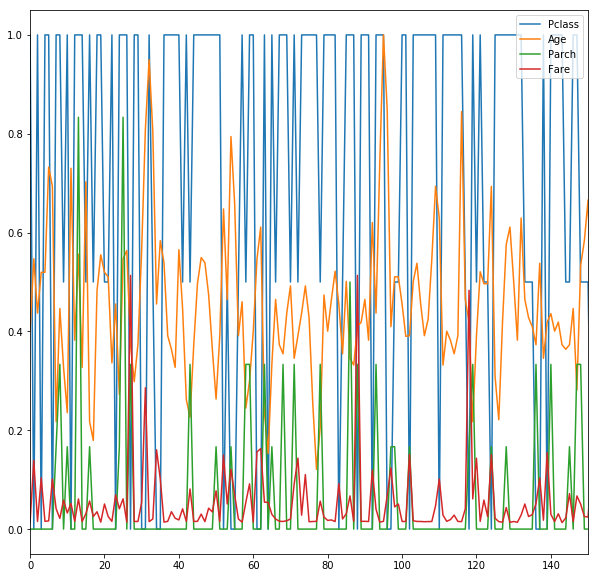

In [69]:
# Иного способа для адекватного отображения, кроме как вывода лишь части датасета, придумать не удалось 
norm_number_data[['Pclass','Age','Parch','Fare']].plot(figsize=(10,10), xlim=(0,150))

In [70]:
ma_scaler = preprocessing.MaxAbsScaler()
ma_norm_data = number_data.copy()
ma_norm_data[sel_columns] = ma_scaler.fit_transform(number_data[sel_columns])
ma_norm_data.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,1.000000,0.251556,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,2,1.0,0.333333,0.434506,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,3,1.0,1.000000,0.297293,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0


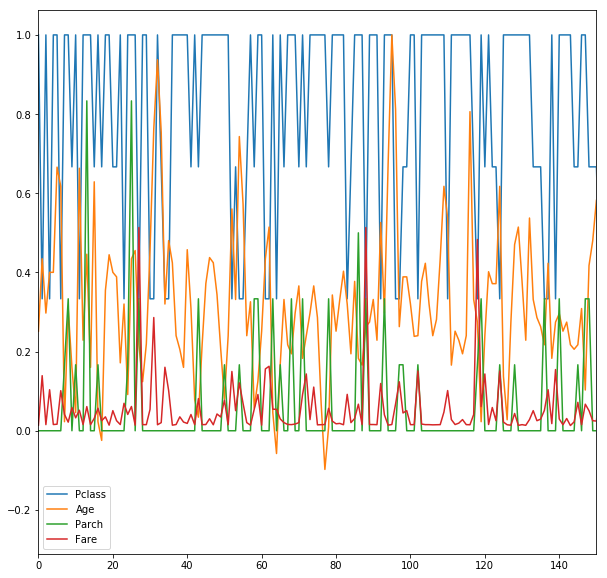

In [72]:
ma_norm_data[['Pclass','Age','Parch','Fare']].plot(figsize=(10,10), xlim=(0,150))

In [73]:
std_scaler = preprocessing.StandardScaler()

std_norm_data = number_data.copy()
std_norm_data[sel_columns] = std_scaler.fit_transform(number_data[sel_columns])
std_norm_data.head(3)

c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.789272,0.827377,-0.508074,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.483810,-0.309743,0.619306
1,2,1.266990,-1.566107,0.542890,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.066928,-0.309743,-1.614710
2,3,1.266990,0.827377,-0.245333,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.483810,-0.309743,0.619306


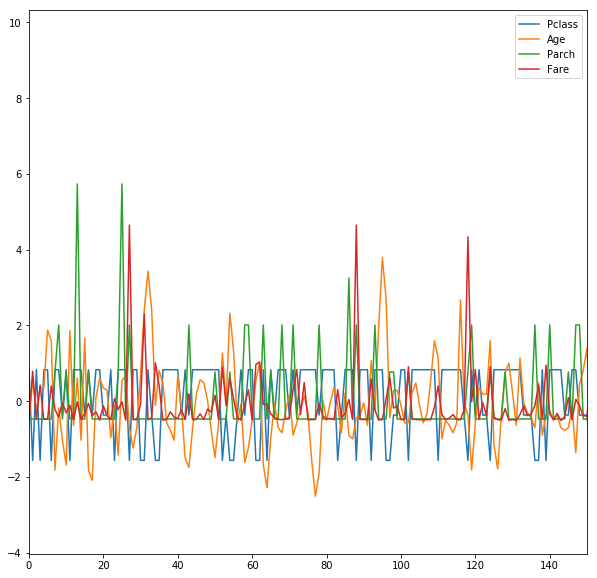

In [113]:
std_norm_data[['Pclass','Age','Parch','Fare']].plot(figsize=(10,10), xlim=(0,150))

Пропущен RobustScaler, потому что принципиально он ничем не отличается

### 4.Pipeline

In [75]:
import sklearn.pipeline as pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [76]:
class DropOutlet(BaseEstimator):
    """
    Удаление всех значений, выходящих за пределы основной части нормального распределения
    """
    def fit(self, data: pd.DataFrame, y=None):
        data.select_dtypes(include=['float', 'int'])
        self.std = data.std()
        self.columns = self.std.index.values
        return self
    
    def transform(self, data: pd.DataFrame, y=None) -> pd.DataFrame:
        data_cols = data[self.columns]
        return data[ (data_cols - data_cols.mean()).abs() <= 3*self.std ].dropna()

class PandasToNumpy(BaseEstimator):
    def fit(self, data: pd.DataFrame, y=None):
        return self
    
    def transform(self, data: pd.DataFrame, y=None) -> np.ndarray:
        return data.values

class SparseToArray(TransformerMixin, BaseEstimator):
    """
    Преобразование непонятного вида матрицы в православную
    """
    def fit(self, data, y=None):
        return self
    
    def transform(self, data, y=None):
        return data.toarray()
    
class ModifyLabelEncoder(preprocessing.LabelEncoder):
    """
    Костыль по умолчанию
    """
    def fit(self, data, y=None):
        return super().fit(data)
    
    def transform(self, data, y=None):
        return super.transform(data)
    
    def fit_transform(self, data, y=None):
        return super().fit_transform(data)
    

In [93]:
#Использую заполненные данные (интерполяцией и методом соседей)
dumm_data = pd.get_dummies(df)
spec_data = dumm_data[sel_columns].copy()
y_data = pd.DataFrame(data=dumm_data['Survived'],columns=['Survived'])
x_data = dumm_data[sel_columns[1:]]

In [112]:
x_data.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1


In [99]:
pipe_outlet = pipeline.Pipeline([('drop_outlet', DropOutlet())])
outletless_data_x = pipe_outlet.fit_transform(x_data)

outletless_data_y = y_data[y_data.index.isin(outletless_data_x.index)]

In [100]:
pipe_x = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('norm', preprocessing.MinMaxScaler())
])
pipe_y = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder())
])

number_data_ready_x = pipe_x.fit_transform(outletless_data_x)
number_data_ready_y = pipe_y.fit_transform(outletless_data_y)

print(number_data_ready_x.shape, number_data_ready_y.shape)

(750, 10) (750,)


c:\users\apc\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
number_data_ready_x[:5,:], number_data_ready_y[:5]

(array([[1.        , 0.37002318, 0.33333333, 0.        , 0.04397492,
         0.        , 1.        , 0.        , 0.        , 1.        ],
        [0.        , 0.5638622 , 0.33333333, 0.        , 0.4323693 ,
         1.        , 0.        , 1.        , 0.        , 0.        ],
        [1.        , 0.41848293, 0.        , 0.        , 0.04806914,
         1.        , 0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.52751738, 0.33333333, 0.        , 0.32207838,
         1.        , 0.        , 0.        , 0.        , 1.        ],
        [1.        , 0.52751738, 0.        , 0.        , 0.04882733,
         0.        , 1.        , 0.        , 0.        , 1.        ]]),
 array([0, 1, 1, 1, 0], dtype=int64))

In [111]:
np.savetxt('titanic_x.csv', number_data_ready_x, delimiter=',')
np.savetxt('titanic_y.csv', number_data_ready_y, delimiter=',')